In [1]:
import os
import subprocess
import sys

print("JAVA_HOME:", os.environ.get("JAVA_HOME"))
print("SPARK_HOME:", os.environ.get("SPARK_HOME"))
print("Python version:", sys.version)

try:
    result = subprocess.run(["java", "-version"], capture_output=True, text=True)
    print("java -version output:")
    print(result.stderr)
except Exception as e:
    print("Error menjalankan java:", e)

JAVA_HOME: /home/hani/anaconda3/envs/BigData024
SPARK_HOME: /home/hani/Downloads/spark-3.5.6-bin-hadoop3
Python version: 3.13.7 | packaged by Anaconda, Inc. | (main, Sep  9 2025, 19:59:03) [GCC 11.2.0]
java -version output:
openjdk version "21.0.6" 2025-01-21
OpenJDK Runtime Environment JBR-21.0.6+9-895.97-nomod (build 21.0.6+9-b895.97)
OpenJDK 64-Bit Server VM JBR-21.0.6+9-895.97-nomod (build 21.0.6+9-b895.97, mixed mode, sharing)



In [1]:
import sys
print(sys.executable)

/home/hani/anaconda3/envs/BigData024/bin/python


In [2]:
import findspark
findspark.init()
print('$SPARK_HOME:', findspark.find())

$SPARK_HOME: /home/hani/Downloads/spark-3.5.6-bin-hadoop3


In [ ]:
# Practice

In [3]:
# Initialize Spark Session

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('MLlib Example').getOrCreate()

print('SparkSession berhasil diinisialisasi!')

25/11/30 06:18:28 WARN Utils: Your hostname, hani-HP-240-G8-Notebook-PC resolves to a loopback address: 127.0.1.1; using 192.168.1.4 instead (on interface wlo1)
25/11/30 06:18:28 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/30 06:18:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


SparkSession berhasil diinisialisasi!


In [4]:
# Example: Linear Regression with Spark MLlib
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Load sample data
data = [(1, 5.0, 20.0), (2, 10.0, 25.0), (3, 15.0, 30.0), (4, 20.0, 35.0)]
columns = ['ID', 'Feature', 'Target']
df = spark.createDataFrame(data, columns)

# Prepare data for modeling
assembler = VectorAssembler(inputCols=['Feature'], outputCol='Features')
df_transformed = assembler.transform(df)

# Train a linear regression model
lr = LinearRegression(featuresCol='Features', labelCol='Target')
model = lr.fit(df_transformed)

# Print model coefficients
print('\033[1mLINEAR REGRESSION\033[0m')
print(f'Coefficients: {model.coefficients}')
print(f'Intercept   : {model.intercept}')

25/11/30 06:18:42 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
25/11/30 06:18:43 WARN Instrumentation: [94a54d40] regParam is zero, which might cause numerical instability and overfitting.
25/11/30 06:18:44 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
                                                                                

LINEAR REGRESSION
Coefficients: [0.9999999999999992]
Intercept   : 15.000000000000009


In [12]:
# Practice: Logistic Regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

# Example dataset
data = [(1, [2.0, 3.0], 0), 
        (2, [1.0, 5.0], 1), 
        (3, [2.5, 4.5], 1), 
        (4, [3.0, 6.0], 0)]
columns = ['ID', 'Features', 'Label']
df = spark.createDataFrame(data, columns)

# Create new columns for Features[0] and Features[1] using Spark Functions
df = df.withColumn('Features1', col('Features').getItem(0)).withColumn('Features2', col('Features').getItem(1))

# Prepare data for modeling
assembler = VectorAssembler(inputCols=['Features1', 'Features2'], outputCol='FeaturesVector')
df = assembler.transform(df)

# Train logistic regression model
lr = LogisticRegression(featuresCol='FeaturesVector', labelCol='Label')
model = lr.fit(df)

# Display coefficients and summary
print('\033[1mLOGISTIC REGRESSION\033[0m')
print(f'Coefficients: {model.coefficients}')
print(f'Intercept: {model.intercept}')

LOGISTIC REGRESSION
Coefficients: [-12.262057913348004,4.087352261205701]
Intercept: 11.56891271083812


In [14]:
# Practice: KMeans Clustering
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

# Example dataset
data = [(1, [1.0, 1.0]), 
        (2, [5.0, 5.0]), 
        (3, [10.0, 10.0]), 
        (4, [15.0, 15.0])]
columns = ['ID', 'Features']
df = spark.createDataFrame(data, columns)

# Create new columns for Features[0] and Features[1] using Spark Functions
df = df.withColumn('Features1', col('Features').getItem(0)).withColumn('Features2', col('Features').getItem(1))

# Prepare data for modeling
assembler = VectorAssembler(inputCols=['Features1', 'Features2'], outputCol='FeaturesVector')
df = assembler.transform(df)

# Train KMeans clustering model
kmeans = KMeans(featuresCol='FeaturesVector', k=2)
model = kmeans.fit(df)

# Show cluster centers
print('\033[1mKMEANS CLUSTERING\033[0m')
centers = model.clusterCenters()
print(f'Cluster Centers: {centers}')

# Show cluster assignment for each data point
print("\033[1mCLUSTER ASSIGNMENT\033[0m")
result = model.transform(df)
result.show()

KMEANS CLUSTERING
Cluster Centers: [array([12.5, 12.5]), array([3., 3.])]
CLUSTER ASSIGNMENT
+---+------------+---------+---------+--------------+----------+
| ID|    Features|Features1|Features2|FeaturesVector|prediction|
+---+------------+---------+---------+--------------+----------+
|  1|  [1.0, 1.0]|      1.0|      1.0|     [1.0,1.0]|         1|
|  2|  [5.0, 5.0]|      5.0|      5.0|     [5.0,5.0]|         1|
|  3|[10.0, 10.0]|     10.0|     10.0|   [10.0,10.0]|         0|
|  4|[15.0, 15.0]|     15.0|     15.0|   [15.0,15.0]|         0|
+---+------------+---------+---------+--------------+----------+



In [ ]:
# Homework

In [3]:
# Initialize Spark Session

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('HomeworkHandsOn14').getOrCreate()

print(f'SparkSession {spark.sparkContext.appName} berhasil diinisialisasi!')

25/11/30 19:19:31 WARN Utils: Your hostname, hani-HP-240-G8-Notebook-PC resolves to a loopback address: 127.0.1.1; using 192.168.1.4 instead (on interface wlo1)
25/11/30 19:19:31 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/30 19:19:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


SparkSession HomeworkHandsOn14 berhasil diinisialisasi!


In [4]:
# Load Dataset

df = spark.read.csv('/home/hani/Downloads/Titanic-Dataset.csv', header='True', inferSchema=True)

print('Dataset berhasil di-load!')

Dataset berhasil di-load!


In [5]:
# Show The First 5 Rows

df.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [6]:
# Show Dataset Information

df.printSchema()
print('Count rows   :', df.count())
print('Count columns:', len(df.columns))

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)

Count rows   : 891
Count columns: 12


In [7]:
# Detect Missing Values

from pyspark.sql.functions import col, when, count

print('\033[1mJUMLAH MISSING VALUES DI SETIAP KOLOM:\033[0m')

missing_values = df.select([
    count(when(col(c).isNull(), c)).alias(c)
    for c in df.columns
])

missing_values.show()

JUMLAH MISSING VALUES DI SETIAP KOLOM:
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



In [8]:
# Handling Missing Values

from pyspark.sql.functions import mean

# Handle column 'Ages' with imputation
mean_age = df.select(mean('Age')).collect()[0][0]
df = df.fillna({'Age': mean_age})

# Handle column 'Cabin' with string 'UNKNOWN'
df = df.withColumn('Cabin',when(df['Cabin'] == 'NULL', None).otherwise(df['Cabin'])).fillna({'Cabin': 'UNKNOWN'})

# Handle column 'Embarked' with string 'U'
df = df.fillna({'Embarked': 'U'})

# Verify
print('\033[1mJUMLAH MISSING VALUES DI SETIAP KOLOM (AFTER HANDLING):\033[0m')

missing_values = df.select([
    count(when(col(c).isNull(), c)).alias(c)
    for c in df.columns
])

missing_values.show()

JUMLAH MISSING VALUES DI SETIAP KOLOM (AFTER HANDLING):
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|  0|    0|    0|     0|   0|    0|       0|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



In [9]:
# Encode Categorical Columns -> Columns 'Sex'

from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol='Sex', outputCol='SexIndexed')
df = indexer.fit(df).transform(df)

print('\033[1mENCODE KOLOM SEX\033[0m')
print('Mapping kategori ke angka (StringIndexer):')
print(' - male  : 0.0')
print(' - female: 1.0')
df.select('Sex', 'SexIndexed').show(10)

ENCODE KOLOM SEX
Mapping kategori ke angka (StringIndexer):
 - male  : 0.0
 - female: 1.0
+------+----------+
|   Sex|SexIndexed|
+------+----------+
|  male|       0.0|
|female|       1.0|
|female|       1.0|
|female|       1.0|
|  male|       0.0|
|  male|       0.0|
|  male|       0.0|
|  male|       0.0|
|female|       1.0|
|female|       1.0|
+------+----------+
only showing top 10 rows



In [10]:
# Feature Vector

from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=['Pclass', 'SexIndexed', 'Age', 'SibSp', 'Parch', 'Fare'],
    outputCol='featuresVector'
)

df = assembler.transform(df)

# Show result
print("\033[1mFEATURE VECTOR\033[0m")
df.select('PassengerId', 'Pclass', 'SexIndexed', 'Age', 'SibSp', 'Parch', 'Fare', 'featuresVector').show(10, truncate=False)

FEATURE VECTOR
+-----------+------+----------+-----------------+-----+-----+-------+------------------------------------------+
|PassengerId|Pclass|SexIndexed|Age              |SibSp|Parch|Fare   |featuresVector                            |
+-----------+------+----------+-----------------+-----+-----+-------+------------------------------------------+
|1          |3     |0.0       |22.0             |1    |0    |7.25   |[3.0,0.0,22.0,1.0,0.0,7.25]               |
|2          |1     |1.0       |38.0             |1    |0    |71.2833|[1.0,1.0,38.0,1.0,0.0,71.2833]            |
|3          |3     |1.0       |26.0             |0    |0    |7.925  |[3.0,1.0,26.0,0.0,0.0,7.925]              |
|4          |1     |1.0       |35.0             |1    |0    |53.1   |[1.0,1.0,35.0,1.0,0.0,53.1]               |
|5          |3     |0.0       |35.0             |0    |0    |8.05   |[3.0,0.0,35.0,0.0,0.0,8.05]               |
|6          |3     |0.0       |29.69911764705882|0    |0    |8.4583 |[3.0,0.0,29.

In [11]:
# Train-Test Split

train, test = df.randomSplit([0.8, 0.2], seed=42)

print("\033[1mTRAIN-TEST SPLIT\033[0m")
print('Data Train:', train.count())
print('Data Test :', test.count())

TRAIN-TEST SPLIT
Data Train: 746
Data Test : 145


In [14]:
# Build Classification Model with Logistic Regression

from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol='featuresVector', labelCol='Survived')

print('Training model Logistic Regression ...')

lr_model = lr.fit(train)
lr_pred =  lr_model.transform(test)

print('Model Logistic Regression berhasil dilatih!')

Training model Logistic Regression ...


25/11/30 19:28:32 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
                                                                                

Model Logistic Regression berhasil dilatih!


In [15]:
# Evaluate Model

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

pred =  lr_model.transform(test)

evaluator = MulticlassClassificationEvaluator(labelCol='Survived', predictionCol='prediction')

acc = evaluator.evaluate(pred, {evaluator.metricName: 'accuracy'})
f1 = evaluator.evaluate(pred, {evaluator.metricName: 'f1'})

print('\033[1mEVALUASI MODEL LOGISTIC REGRESSION\033[0m')
print('Akurasi :', acc)
print('F1-Score:', f1)

EVALUASI MODEL LOGISTIC REGRESSION
Akurasi : 0.7862068965517242
F1-Score: 0.784341065830721


In [16]:
# Hyperparameter Tunning (Cross-Validation)

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Parameter grid
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.1, 0.5])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [10, 50])
             .build())

# Cross Validator
cv = CrossValidator(
    estimator=lr,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=5
)

cvModel = cv.fit(train)
cv_predictions = cvModel.transform(test)

auc_cv = evaluator.evaluate(cv_predictions)

print("\033[1mCROSS-VALIDATED MODEL PERFORMANCE\033[0m")
print(f"Best AUC: {auc_cv}")

# Best model parameters
best_model = cvModel.bestModel

print("\033[1mBEST MODEL PARAMETERS\033[0m")
print("regParam        :", best_model._java_obj.getRegParam())
print("elasticNetParam :", best_model._java_obj.getElasticNetParam())
print("maxIter         :", best_model._java_obj.getMaxIter())

CROSS-VALIDATED MODEL PERFORMANCE
Best AUC: 0.7776869985448622
BEST MODEL PARAMETERS
regParam        : 0.01
elasticNetParam : 0.5
maxIter         : 10


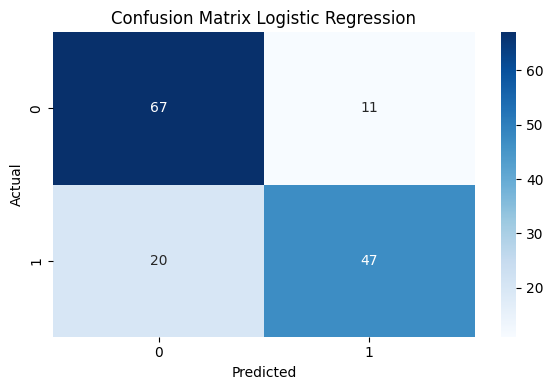

In [18]:
# Confusion Matrix

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Convert Spark predictions to pandas DataFrame
pdf = lr_pred.select("Survived", "prediction").toPandas()

# Create confusion matrix
cm = confusion_matrix(pdf["Survived"], pdf["prediction"])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.title("Confusion Matrix Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()